## Modules

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from tqdm import tqdm

import requests
import pandas as pd
from pandas import Series, DataFrame

from IPython.core.display import Image, display

# own API handler
from api_wrapper import get_df_from_query
from api_wrapper import get_visits_df

## Styling

In [2]:
# Charts styling
plt.style.use('fivethirtyeight')
#plt.style.use('bmh')
#plt.style.use('ggplot')
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8 # increases figure size
matplotlib.rcParams.update({'font.size': 14}) # increases chart font size
rcParams['font.family'] = 'Arial Narrow'

# style to enhance df viz, from https://github.com/brandon-rhodes/pycon-pandas-tutorial
from IPython.core.display import HTML
css = open('style-table.css').read() #+ open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
# Sets input parameters 
DAYS_AGO = 365 # days to look back in visits history
ITEMS_TO_QUERY = 200 # number of itens requested per query (max. permitted by ML is 200)
TOTAL_ITEMS_TO_QUERY = 500 # max. number of results to be downloaded ("None" to make it limitless)
ITEMS_TO_PLOT = 10 # list of "ITEMS_TO_PLOT" top sold items; e.g. if 10, visits from top 10 sold itens will be plotted

In [4]:
query = input('Qual a busca desejada? ')

df = get_df_from_query(query, ITEMS_TO_QUERY, 600)

df.sort_values('revenue').head()

Qual a busca desejada? kit painel solar
Buscando por "kit painel solar"...


100%|██████████| 156/156 [00:01<00:00, 133.05it/s]


,title,price,sold_quantity,available_quantity,permalink,thumbnail,seller_address,seller,stop_time,revenue,start_time,days_ago,city,state,seller_id
id,,,,,,,,,,,,,,,
MLB811046311,Kit Gerador Energia Painel Solar 12v 150w Cone...,683.38,0,4,http://produto.mercadolivre.com.br/MLB-8110463...,http://mlb-s2-p.mlstatic.com/861215-MLB2515440...,"{'latitude': -26.491592, 'country': {'id': 'BR...","{'id': 144594740, 'car_dealer': False, 'tags':...",2036-11-04 15:43:31,0.0,2016-11-04 15:43:31,9,Jaraguá do Sul,Santa Catarina,144594740
MLB796110294,Gerador Energia Kit Painel Solar 12v 150w Cont...,943.99,0,4,http://produto.mercadolivre.com.br/MLB-7961102...,http://mlb-s2-p.mlstatic.com/437505-MLB2503134...,"{'latitude': -26.491592, 'country': {'id': 'BR...","{'id': 144594740, 'car_dealer': False, 'tags':...",2036-09-09 19:32:17,0.0,2016-09-09 19:32:17,65,Jaraguá do Sul,Santa Catarina,144594740
MLB796105554,Kit Gerador Energia Painel Solar 12v 150w Cont...,935.99,0,4,http://produto.mercadolivre.com.br/MLB-7961055...,http://mlb-s2-p.mlstatic.com/437505-MLB2503134...,"{'latitude': -26.491592, 'country': {'id': 'BR...","{'id': 144594740, 'car_dealer': False, 'tags':...",2036-09-09 19:19:14,0.0,2016-09-09 19:19:14,65,Jaraguá do Sul,Santa Catarina,144594740
MLB796104890,Kit Gerador Energia Solar Painel Solar 12v 150...,935.99,0,4,http://produto.mercadolivre.com.br/MLB-7961048...,http://mlb-s2-p.mlstatic.com/437505-MLB2503134...,"{'latitude': -26.491592, 'country': {'id': 'BR...","{'id': 144594740, 'car_dealer': False, 'tags':...",2036-09-09 19:11:13,0.0,2016-09-09 19:11:13,65,Jaraguá do Sul,Santa Catarina,144594740
MLB795616448,Tycon Tpsk24-85w Kit Painel Solar 85w 24v,2754.00,0,12,http://produto.mercadolivre.com.br/MLB-7956164...,http://mlb-s2-p.mlstatic.com/462605-MLB2504879...,"{'latitude': -27.1970361, 'country': {'id': 'B...","{'id': 228242902, 'car_dealer': False, 'tags':...",2036-09-08 05:06:41,0.0,2016-09-08 05:06:41,66,Iraí,Rio Grande do Sul,228242902


In [6]:
ds = df.describe()
ds

,price,sold_quantity,available_quantity,revenue,days_ago,seller_id
count,99.000000,99.000000,99.000000,99.000000,99.000000,9.900000e+01
mean,2460.573939,3.868687,1203.191919,3764.975354,632.060606,1.287910e+08
std,2920.103698,12.217123,3053.930848,10916.288885,1846.769545,7.371401e+07
min,30.000000,0.000000,1.000000,0.000000,9.000000,5.039910e+05
25%,795.000000,0.000000,1.000000,0.000000,52.500000,5.634843e+07
50%,1480.000000,0.000000,5.000000,0.000000,101.000000,1.445947e+08
75%,3282.000000,2.000000,78.500000,2222.870000,184.000000,2.049308e+08
max,17680.000000,98.000000,9763.000000,83163.000000,7303.000000,2.309476e+08


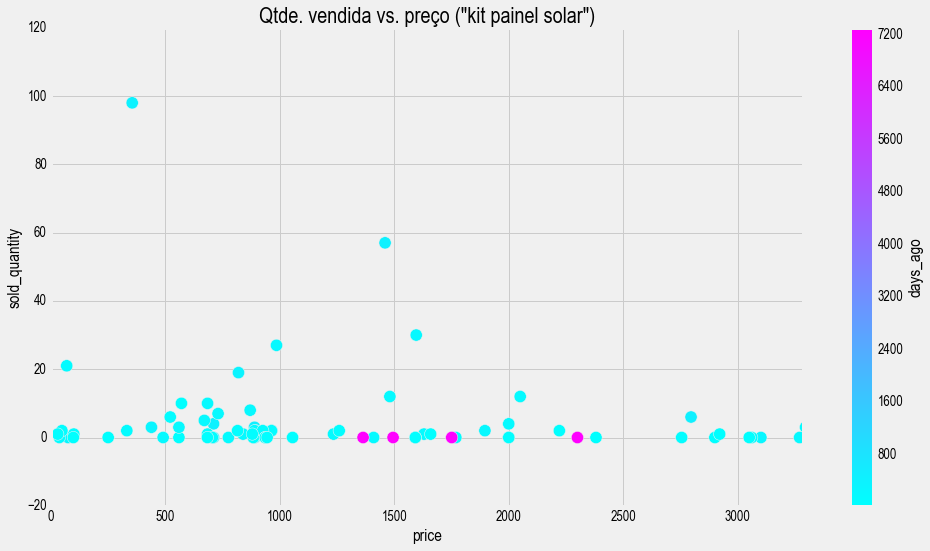

In [7]:
_xlim=(0, ds.loc['75%', 'price'])

df.plot.scatter('price', 'sold_quantity', c='days_ago', cmap='cool', xlim=_xlim, s=150)
plt.title('Qtde. vendida vs. preço ("' + query + '")', fontsize=22)

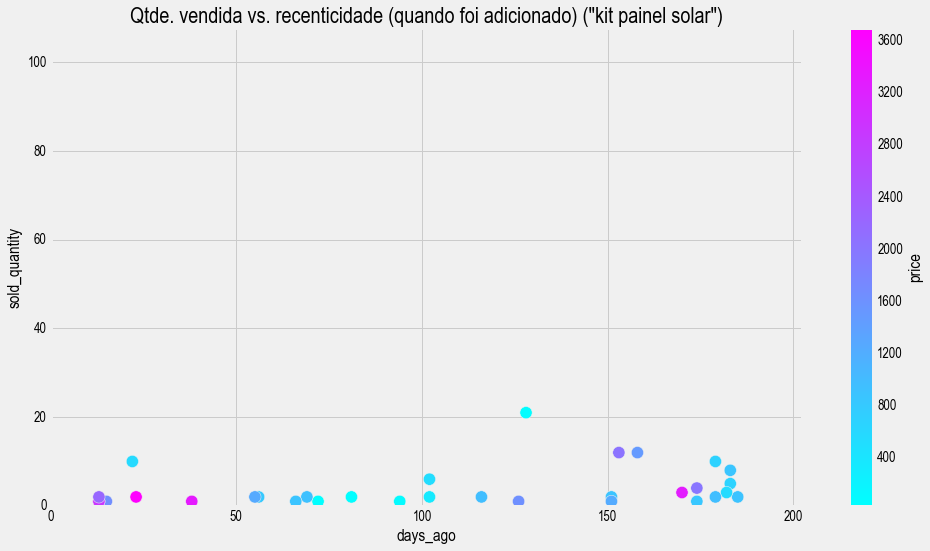

In [8]:
_ymin = ds.loc['25%', 'sold_quantity']

a = df[(df.sold_quantity > _ymin)]

_xlim = (0, ds.loc['75%', 'days_ago']*1.1)
_ylim = (0, ds.loc['max', 'sold_quantity']*1.1)

a.plot.scatter('days_ago', 'sold_quantity', c='price', cmap='cool', xlim=_xlim, ylim=_ylim, s=150)
plt.title('Qtde. vendida vs. recenticidade (quando foi adicionado) ("' + query + '")', fontsize=22)

In [9]:
visits = get_visits_df(df, 20)

In [10]:
visits.head()

,MLB695065272,MLB696113241,MLB712968328,MLB754575430,MLB773028235,MLB771395114,MLB699427412,MLB727650542,MLB714376855,MLB767638167,MLB807238946,MLB765601179,MLB766503986,MLB765601081,MLB760460786,MLB809896695,MLB753464872,MLB809893310,MLB765599263,MLB802832931
date,,,,,,,,,,,,,,,,,,,,
2015-11-14 04:00:00,169,31,87,0,0,0,36,0,19,0,0,0,0,0,0,0,0,0,0,0
2015-11-15 04:00:00,207,51,122,0,0,0,59,0,14,0,0,0,0,0,0,0,0,0,0,0
2015-11-16 04:00:00,171,13,121,0,0,0,54,0,17,0,0,0,0,0,0,0,0,0,0,0
2015-11-17 04:00:00,158,0,109,0,0,0,58,0,19,0,0,0,0,0,0,0,0,0,0,0
2015-11-18 04:00:00,158,31,120,0,0,0,54,0,22,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
get_visits_df()